In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
head_brain = pd.read_csv('datasets/headbrain.csv')
head_brain.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
head_brain.shape

(237, 4)

In [4]:
head_size = 'Head Size(cm^3)'
brain_wt = 'Brain Weight(grams)'

In [5]:
X = head_brain[[head_size, brain_wt]]
X.sample(10)

,Head Size(cm^3),Brain Weight(grams)
234,3233,1104
172,3571,1316
26,4036,1490
15,3876,1405
188,3394,1243
72,4121,1380
210,2937,1070
99,3478,1270
32,4103,1364
136,3791,1260


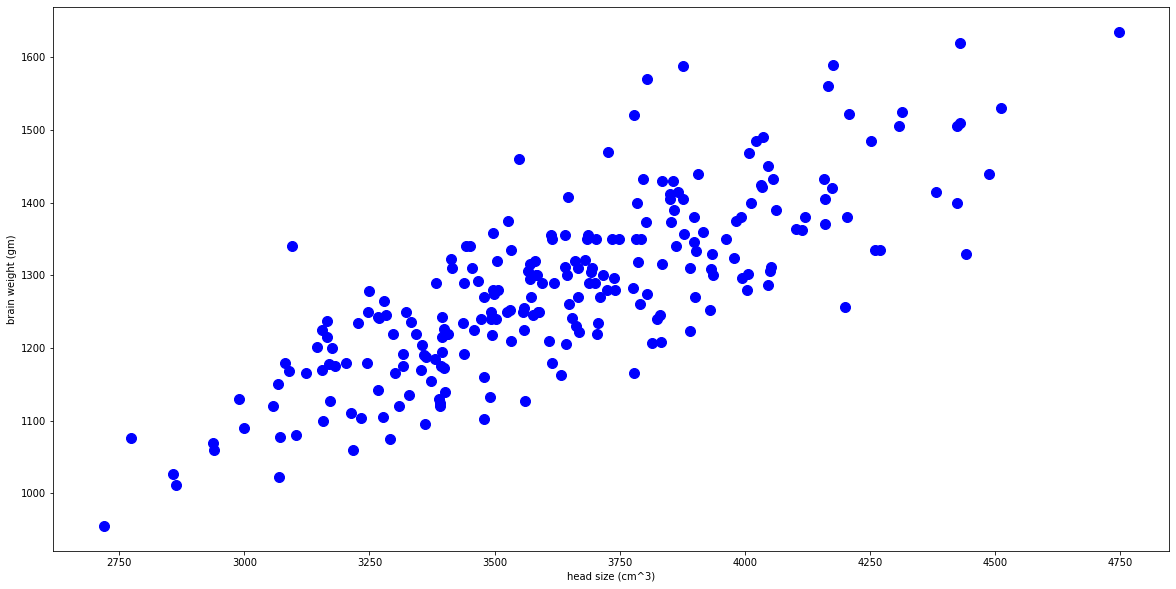

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(X[head_size],
            X[brain_wt],
            color= 'blue',
            s= 100)
plt.ylabel('brain weight (gm)')
plt.xlabel('head size (cm^3)')

plt.show()

### elliptic envelope

In [9]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(support_fraction= None, contamination= 0.1)

y_pred = ee.fit_predict(X)
y_pred

array([-1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [10]:
n_outliers = (y_pred == -1).sum()
n_outliers

24

In [11]:
xx, yy = np.meshgrid(np.linspace(X[head_size].min(), X[head_size].max(), 500),
                     np.linspace(X[brain_wt].min(), X[brain_wt].max(), 500))
Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

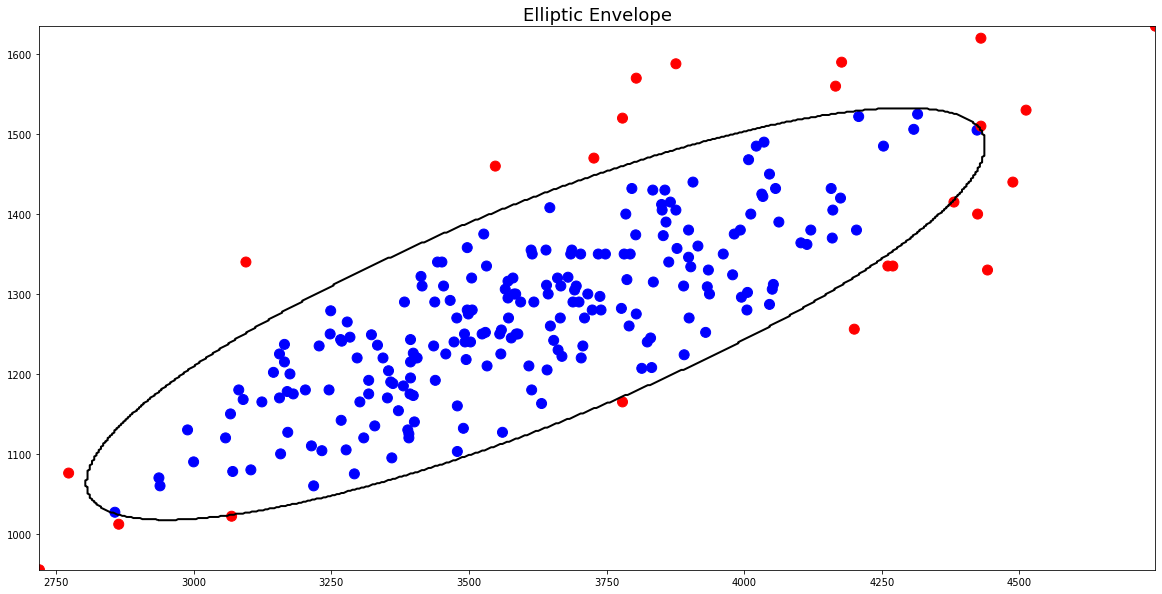

In [15]:
colors = np.array(['r', 'b'])

fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(X[head_size],
            X[brain_wt],
            color= colors[(y_pred + 1) // 2],
            s= 100)
plt.contour(xx, yy, Z,
            levels= [0],
            linewidths= 2,
            colors= 'black')

plt.title('Elliptic Envelope', size= 18)
plt.show()

### isolation forest

In [16]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(behaviour= 'new',
                      contamination= 0.08)
y_pred = isf.fit_predict(X)
y_pred

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [17]:
n_outliers = (y_pred == -1).sum()
n_outliers

19

In [18]:
xx, yy = np.meshgrid(np.linspace(X[head_size].min(), X[head_size].max(), 500),
                     np.linspace(X[brain_wt].min(), X[brain_wt].max(), 500))
Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

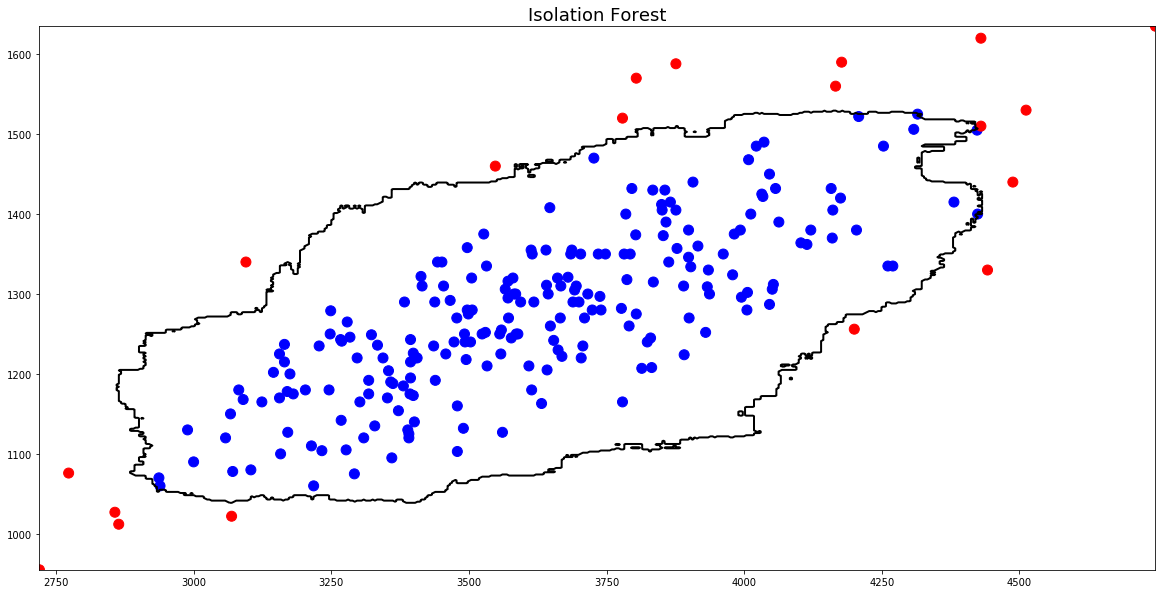

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(X[head_size],
            X[brain_wt],
            color= colors[(y_pred + 1) // 2],
            s= 100)
plt.contour(xx, yy, Z,
            levels= [0],
            linewidths= 2,
            colors= 'black')

plt.title('Isolation Forest', size= 18)
plt.show()

### local outlier factor

In [20]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors= 15,
                         contamination= 'auto')
y_pred = lof.fit_predict(X)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [21]:
n_outliers = (y_pred == -1).sum()
n_outliers

12

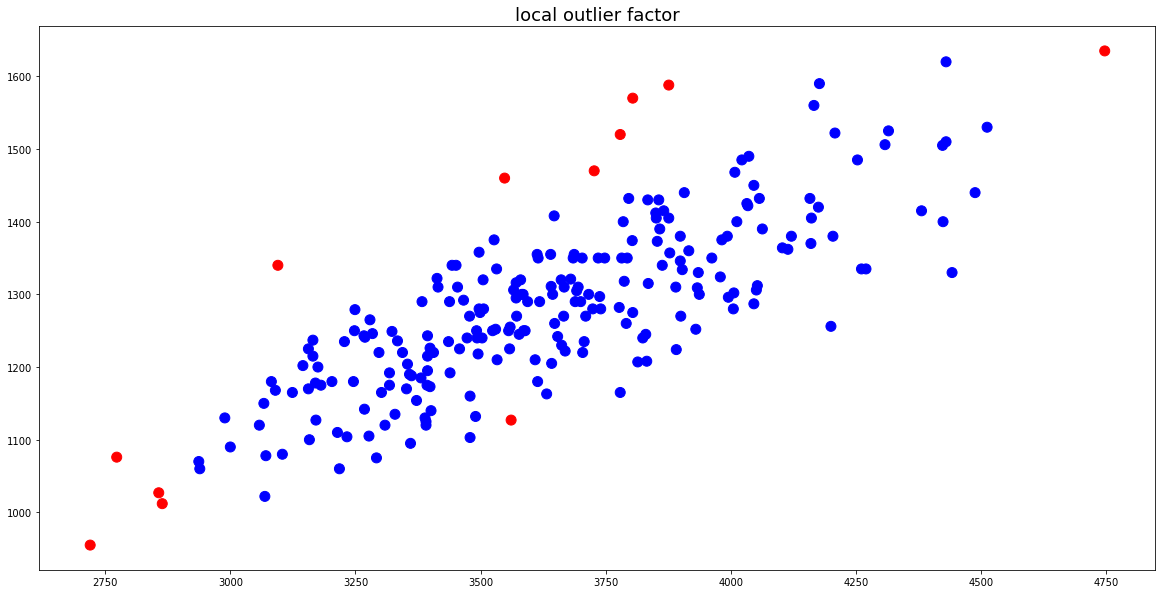

In [22]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(X[head_size],
            X[brain_wt],
            color= colors[(y_pred + 1) // 2],
            s= 100)
plt.title('local outlier factor', size= 18)
plt.show()